<a href="https://colab.research.google.com/github/akalinow/Modern_Particle_Physics_Experiments/blob/2021_2022/13_Machine_learning/mlhep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

author: Mateusz Fila (mfila@fuw.edu.pl)

# Story

Imagine that you are working for some HEP collaboration. Your supervisor is interested in checking if your detector can be used to test some novel and very promising extension of the Standard Model, which predicts some new channels of reactions.

Before your collaboration dedicates a run for this program you need to be sure that your detector will be able to register the new channel and you might be able to extract the need information from the data.

The Monte Carlo team already run the simulations and prepared a very realistic dataset including the channel you will be looking for and background.
All you have to do is prepare an algorithm to check how well can you distinguish your reaction from the background.

What do you do?


# Exercise



## Introduction

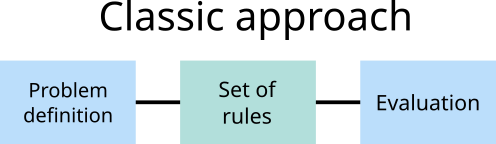

In classic approach we know our task is to distinguish particles produced in an experiment. We start thinking how can we do this, eg. what particles will we observed, maybe we can calculate their masses or charges from the values we can reconstruct from our data, how can we obtain physical parameters from our data. So from our understanding of the problem we prepare a very concrete set of rules.

### What is machine learning (ML)?

*\[Machine learning is a\] field of study that gives computers the ability to learn without being explicitly programmed.*

Arthur Samuel, **1959**

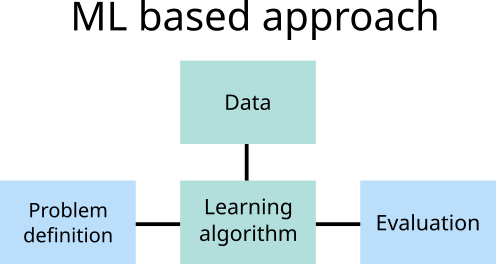

In machine learning based approach instead of constructing our set of rules we will use the data we have to train a model. We don't have to know exactly which physical values we need to construct, if the information is in our data we will let the model learn how to extract it efficiently. This doesn't mean we don't have to understand our problem! If we know that some variables will be useful we can calculate and add them to the dataset to make our model more efficient.

Surprisingly the choice of a specific model is a secondary problem. Most of time the data is more crucial that the model itself. Usually with very good dataset you can achieve good results even with poorly chosen model, but even with the best model we will not score high if the data is garbage.

<img src="https://www.smbc-comics.com/comics/1538492931-20181002.png" alt="https://www.smbc-comics.com/comics/1538492931-20181002.png" width="600"/>

### Machine learning in HEP

- Analysis:
 - classifying signal and background,
 - reconstructing heavy particles and improving energy resolution.
- Event reconstruction:
 - track reconstruction,
 - particle identification.
- Trigger:
 - quick final state prediction.
- Simulations:
 - generating realistic electronic effects,
 - faster than Monte Carlo event generation.
- Slow control:
 - early fault state prediction.
- Computing:
 - estimating dataset popularity, determining needed number of replicas.

<img src="https://i.imgflip.com/4v5cgo.jpg" alt="https://i.imgflip.com/4v5cgo.jpg" width="600"/>


### What about deep learning?

Deep learning is a specialized form of machine learning, using neural networks (NN) to deliver answers. In recent years deep learning proved to be extremely powerful and gained enormous recognition.

Today we wont delve into details of our models and as such we will stick to 'classic' machine learning algorithms (sorry no, even shallow, NN today).

## Techniques

Types of machine learning:
- supervised learning,
- unsupervised learning,
- reinforced learning.

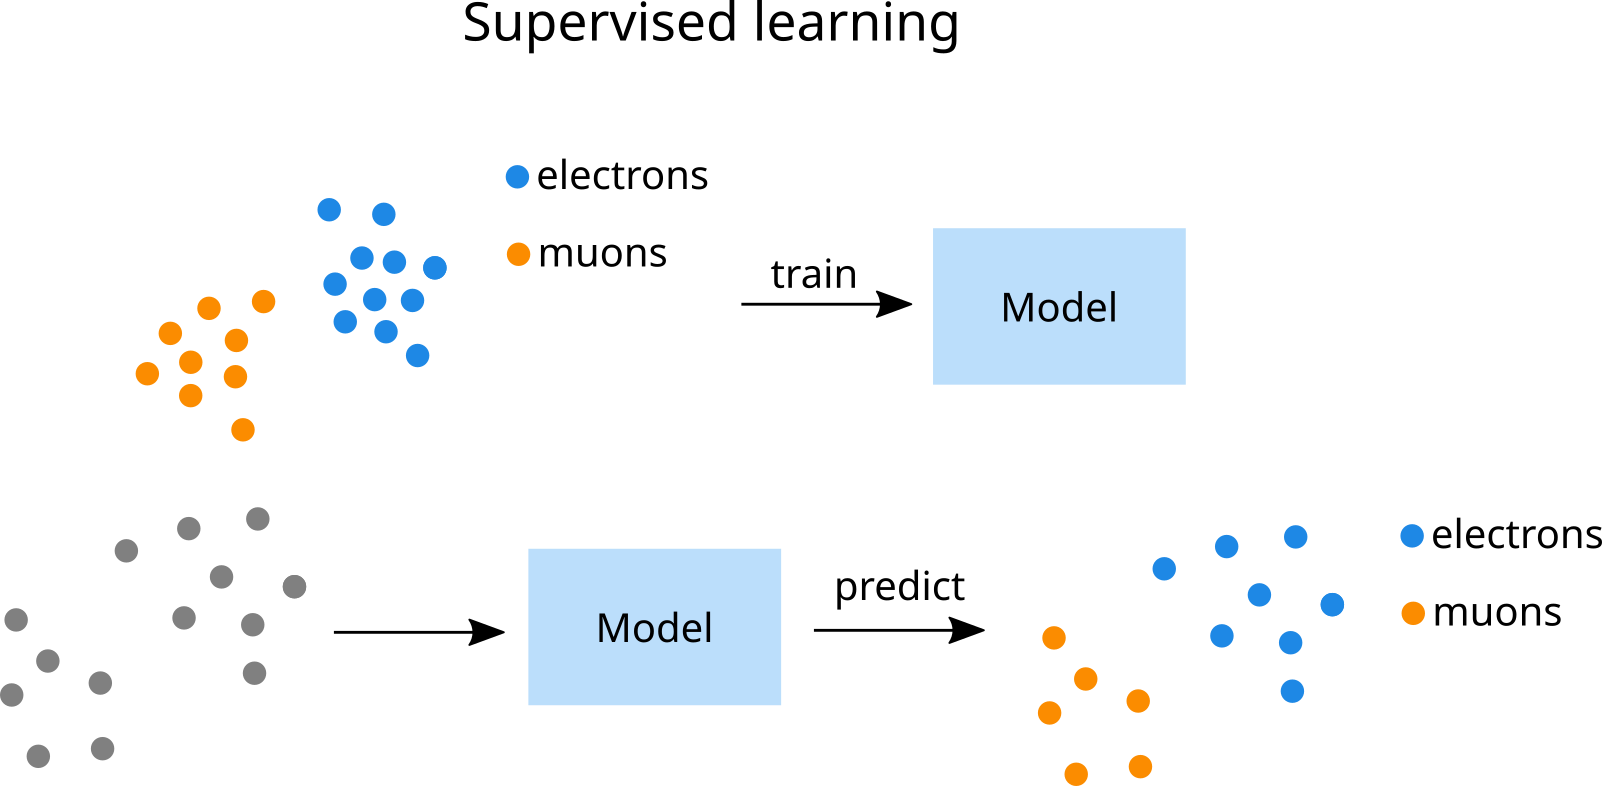

Supervised learning uses labeled datasets to train algorithms for classifying data or predicting outcomes accurately. As input data is fed into the model, it adjusts its weights until the model has been fitted appropriately.

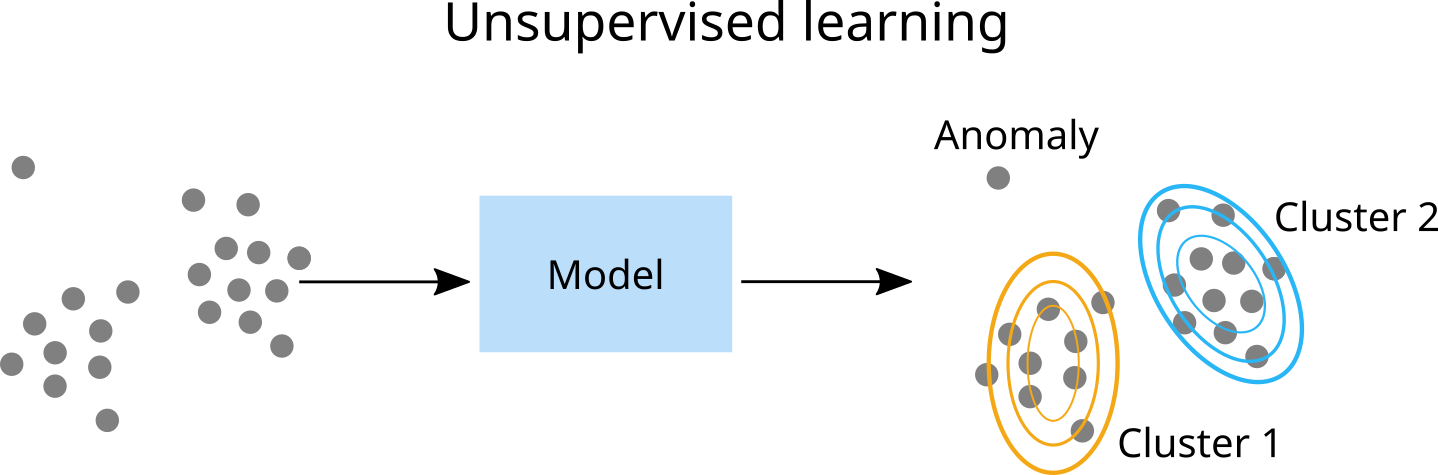

Unsupervised learning uses machine learning algorithms to discover hidden patterns in unlabeled datasets. The algorithms are able to analyze and find clusters or anomalies without the need for any input from experts.

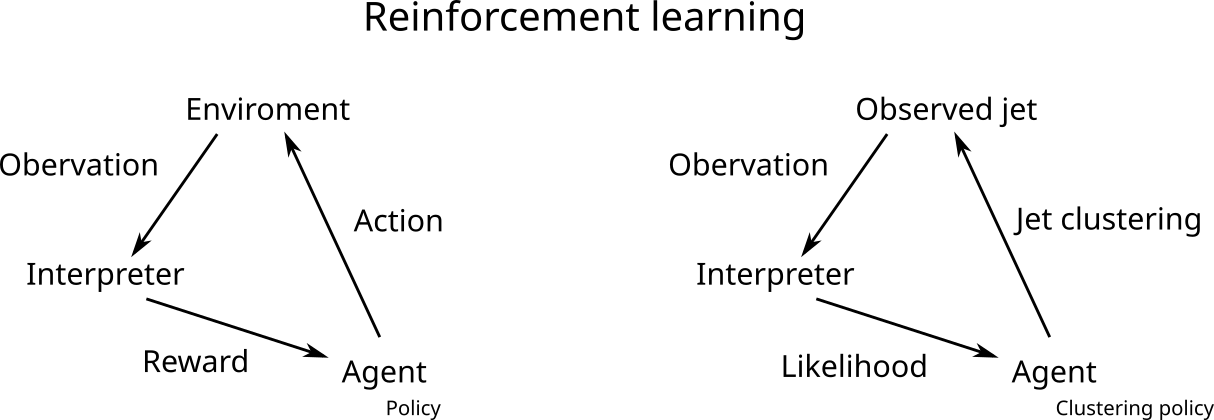

In Reinforcement machine learning the algorithm isn’t trained using sample data, instead it learns by trial and error. A sequence of successful outcomes will be reinforced to develop the best recommendation or policy for a given problem.

🤔 To which category belongs our problem?

🙋 

Categories of problems in supervised learning:
- classification - samples belong to two or more classes and we want to learn from already labeled data how to predict the class of unlabeled data. 
- regression - if the desired output consists of one or more continuous variables, then the task is called regression.

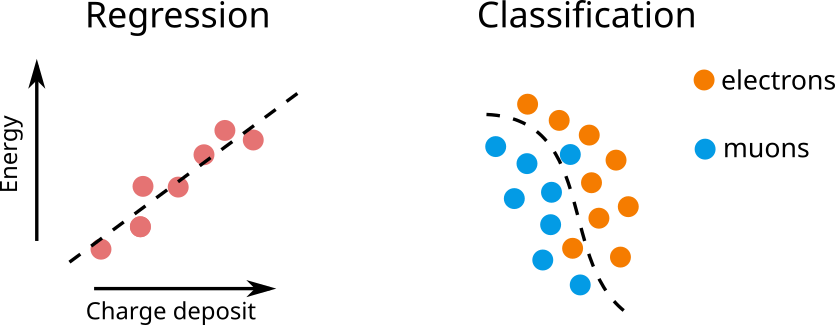

🤔 Is our problem a regression or classification?

🙋

### Types of classification

- binary classification,
- multiclass classification,
- multilabel classification

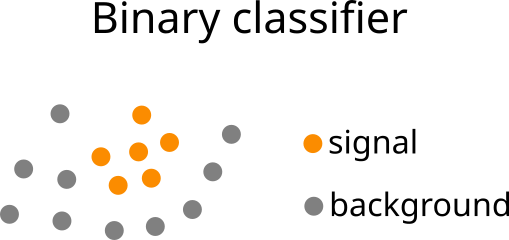

Samples belong to either one of two classes usually called `True` and `False` or `background` and `signal`.

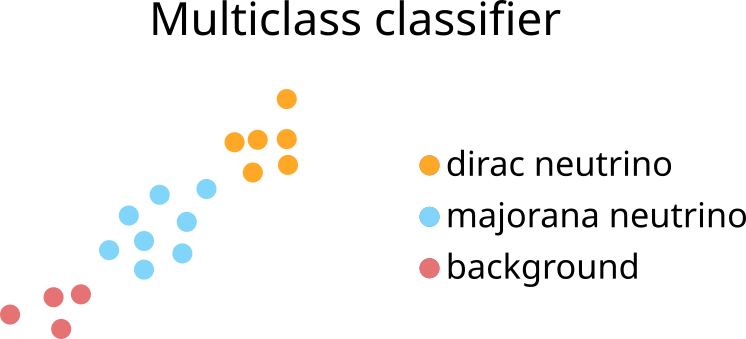

Samples belong to either one of three or more classes. Some algorithms can be naturally extended to multiclass problems otherwise a multiclass classifier can be built from multiple binary classifiers (one-vs-rest or one-vs-one variants).

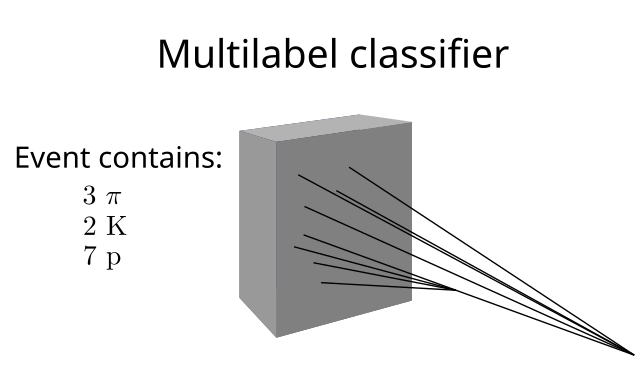

Samples belong to any number of two or more classes. Again, some algorithms can be adapted for multilabel classification otherwise the problem can be transformed to multiple  binary or multiclass problems.

## A tiny bit of theory

In machine learning the variables from which we will make the predictions are called features. The variables we wish to predict are called targets. 

$$\hat{\textbf{y}} = h(\textbf{X})$$
$\textbf{X}$ - vector of features,

$\hat{\textbf{y}}$ - vector of predicted values

$\textbf{y}$ - vector of targets (numerical values in regression, labels in classification)

$h$ - hypothesis function


The algorithm learns through minimalizing a loss function
$\hat{y}$
$$L(\textbf{y}, \hat{\textbf{y}})$$
The minimalization is achieved by changing some parameters or inner state of hypothesis function

The precise formulas for loss function, minimalization algorithm and hypothesis function depend on the problem and machine learning algorithm.



## Classification example

[Dataset from the ATLAS Higgs Boson Machine Learning Challenge 2014](https://opendata.cern.ch/record/328)

The dataset has been built from official ATLAS full-detector simulation of $pp$ collisions and contains a mixture of events:
- $H \rightarrow \tau\tau$, 
- $Z \rightarrow \tau\tau$, 
- $Z \rightarrow tt$
- $W \rightarrow e\tau$ or $\mu\tau$.

Each every event following variables are provided:
- **DER_mass_MMC** -	The estimated mass mH
of the Higgs boson candidate, obtained through a probabilistic phase space integration.
- **DER_mass_transverse_met_lep** -	The transverse mass between the missing transverse energy and the lepton.
- **DER_mass_vis** -	The invariant mass of the hadronic tau and the lepton.
- **DER_pt_h** -	The modulus of the vector sum of the transverse momentum of the hadronic tau, the lepton and the missing transverse energy vector.
- **DER_deltaeta_jet_jet** -	The absolute value of the pseudorapidity separation between the two jets (undefined if PRI_jet_num ≤
1).
- **DER_mass_jet_jet** -	The invariant mass of the two jets (undefined if PRI_jet_num ≤
1).
- **DER_prodeta_jet_jet** -	The product of the pseudorapidities of the two jets (undefined if PRI_jet_num ≤
1).
- **DER_deltar_tau_lep** -	The R separation between the hadronic tau and the lepton.
- **DER_pt_tot** -	The modulus of the vector sum of the missing transverse momenta and the transverse momenta of the hadronic tau, the lepton, the leading jet (if PRI_jet_num ≥
) and the subleading jet (if PRI jet num = 2) (but not of any additional jets).
- **DER_sum_pt** -	The sum of the moduli of the transverse momenta of the hadronic tau, the lepton, the leading jet (if PRI jet num ≥
1) and the subleading jet (if PRI jet num = 2) and the other jets (if PRI jet num = 3).
- **DER_pt_ratio_lep_tau** -	The ratio of the transverse momenta of the lepton and the hadronic tau.
- **DER_met_phi_centrality** -	The centrality of the azimuthal angle of the missing transverse energy vector w.r.t. the hadronic tau and the lepton.
- **DER_lep_eta_centrality** - The centrality of the pseudorapidity of the lepton w.r.t. the two jets (undefined if PRI_jet_num ≤
1).
- **PRI_tau_pt** -	The transverse momentum $\sqrt{p^{2}_{x}+p^{2}_{y}}$
of the hadronic tau.
- **PRI_tau_eta** -	The pseudorapidity η
of the hadronic tau.
- **PRI_tau_phi** -	The azimuth angle ϕ
of the hadronic tau.
- **PRI_lep_pt** 	- The transverse momentum $\sqrt{p^{2}_{x}+p^{2}_{y}}$
of the lepton (electron or muon).
- **PRI_lep_eta** -	The pseudorapidity η
of the lepton.
- **PRI_lep_phi** -	The azimuth angle ϕ
of the lepton.
- **PRI_met** -	The missing transverse energy $\vec{E}^{miss}_{T}$
- **PRI_met_phi** -	The azimuth angle ϕ
of the mssing transverse energy
- **PRI_met_sumet** -	The total transverse energy in the detector.
- **PRI_jet_num** -	The number of jets (integer with value of 0, 1, 2 or 3; possible larger values have been capped at 3).
- **PRI_jet_leading_pt** -	The transverse momentum $\sqrt{p^{2}_{x}+p^{2}_{y}}$
of the leading jet, that is the jet with largest transverse momentum (undefined if PRI_jet_num = 0).
- **PRI_jet_leading_eta** -	The pseudorapidity η
of the leading jet (undefined if PRI jet num = 0).
- **PRI_jet_leading_phi** -	The azimuth angle ϕ
of the leading jet (undefined if PRI jet num = 0).
- **PRI_jet_subleading_pt** -	The transverse momentum $\sqrt{p^{2}_{x}+p^{2}_{y}}$
of the leading jet, that is, the jet with second largest transverse momentum (undefined if PRI_jet_num ≤
1).
- **PRI_jet_subleading_eta** -	The pseudorapidity η
of the subleading jet (undefined if PRI_jet_num ≤
1).
- **PRI_jet_subleading_phi** -	The azimuth angle ϕ
of the subleading jet (undefined if PRI_jet_num ≤
1).
- **PRI_jet_all_pt** - 	The scalar sum of the transverse momentum of all the jets of the events.
- **Weight** 	- The event weight
- **Label** -	The event label (string)
∈ {s,b}
(s for signal, b for background).
- **KaggleSet** -	String specifying to which Kaggle set the event belongs : ”t”:training, ”b”:public leaderboard, ”v”:private leaderboard,”u”:unused.
- **KaggleWeigh**t -	Weight normalised within each Kaggle dataset.

Our task is to build a classifier that will be able to select the $H \rightarrow \tau\tau$ events from the background.

### Data set

First we need to download the dataset. Like many other datasets from CERN our dataset is hosted on [opendata.cern.ch](https://open.data.cern.ch).

In [ ]:
!wget https://opendata.cern.ch/record/328/files/atlas-higgs-challenge-2014-v2.csv.gz

--2022-05-27 11:16:02--  https://opendata.cern.ch/record/328/files/atlas-higgs-challenge-2014-v2.csv.gz
Resolving opendata.cern.ch (opendata.cern.ch)... 188.185.35.172, 188.185.4.228, 188.185.22.9
Connecting to opendata.cern.ch (opendata.cern.ch)|188.185.35.172|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 65630848 (63M) [application/octet-stream]
Saving to: ‘atlas-higgs-challenge-2014-v2.csv.gz.1’

atlas-higgs-challen 100%[===================>]  62.59M  17.8MB/s    in 4.5s    

2022-05-27 11:16:08 (13.9 MB/s) - ‘atlas-higgs-challenge-2014-v2.csv.gz.1’ saved [65630848/65630848]



Now, we need to load the dataset and check what's inside.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('atlas-higgs-challenge-2014-v2.csv.gz')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 818238 entries, 0 to 818237
Data columns (total 35 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   EventId                      818238 non-null  int64  
 1   DER_mass_MMC                 818238 non-null  float64
 2   DER_mass_transverse_met_lep  818238 non-null  float64
 3   DER_mass_vis                 818238 non-null  float64
 4   DER_pt_h                     818238 non-null  float64
 5   DER_deltaeta_jet_jet         818238 non-null  float64
 6   DER_mass_jet_jet             818238 non-null  float64
 7   DER_prodeta_jet_jet          818238 non-null  float64
 8   DER_deltar_tau_lep           818238 non-null  float64
 9   DER_pt_tot                   818238 non-null  float64
 10  DER_sum_pt                   818238 non-null  float64
 11  DER_pt_ratio_lep_tau         818238 non-null  float64
 12  DER_met_phi_centrality       818238 non-null  float64
 13 

After a quick look we don't see any missing values in the dataset, but let's drop them just in case

In [ ]:
df.dropna(inplace = True)

Let's check what is the mysterious `object` in `Label` column.

In [ ]:
df['Label']

0         s
1         b
2         b
3         b
4         b
         ..
818233    s
818234    s
818235    b
818236    b
818237    b
Name: Label, Length: 818238, dtype: object

The algorithm we will use works on numerical values not strings. We need to encode the classes.

In [ ]:
df['Label'] = df['Label']=='s'
df['Label']

0          True
1         False
2         False
3         False
4         False
          ...  
818233     True
818234     True
818235    False
818236    False
818237    False
Name: Label, Length: 818238, dtype: bool

Let's remove columns we won't use

In [ ]:
df.drop(columns = ['KaggleSet', 'KaggleWeight', 'Weight', 'EventId'], inplace = True)

Now we should be left only with interesting data. Let's take another look

In [ ]:
df.head(5).T

,0,1,2,3,4
DER_mass_MMC,138.47,160.937,-999.0,143.905,175.864
DER_mass_transverse_met_lep,51.655,68.768,162.172,81.417,16.915
DER_mass_vis,97.827,103.235,125.953,80.943,134.805
DER_pt_h,27.98,48.146,35.635,0.414,16.405
DER_deltaeta_jet_jet,0.91,-999.0,-999.0,-999.0,-999.0
DER_mass_jet_jet,124.711,-999.0,-999.0,-999.0,-999.0
DER_prodeta_jet_jet,2.666,-999.0,-999.0,-999.0,-999.0
DER_deltar_tau_lep,3.064,3.473,3.148,3.31,3.891
DER_pt_tot,41.928,2.078,9.336,0.414,16.405
DER_sum_pt,197.76,125.157,197.814,75.968,57.983


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
DER_mass_MMC,818238.0,-48.819019,406.118397,-999.000,78.16600,105.061,130.73000,1949.261
DER_mass_transverse_met_lep,818238.0,49.252714,35.378609,0.000,19.30400,46.484,73.62000,968.669
DER_mass_vis,818238.0,81.140561,40.582708,6.329,59.41400,73.744,92.18800,1349.351
DER_pt_h,818238.0,57.849524,63.411938,0.000,14.16425,38.470,79.22675,2834.999
DER_deltaeta_jet_jet,818238.0,-707.740880,454.793899,-999.000,-999.00000,-999.000,0.49900,8.724
DER_mass_jet_jet,818238.0,-600.191191,658.724040,-999.000,-999.00000,-999.000,84.03175,4974.979
DER_prodeta_jet_jet,818238.0,-708.681306,453.328599,-999.000,-999.00000,-999.000,-4.54800,17.650
DER_deltar_tau_lep,818238.0,2.373871,0.780875,0.208,1.81400,2.492,2.96200,5.751
DER_pt_tot,818238.0,18.969617,21.918491,0.000,2.83900,12.383,27.63400,2834.999
DER_sum_pt,818238.0,158.596159,116.089809,46.103,77.49200,120.665,200.88450,2079.162


A plot is worth 1000 words

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f115d1ff410>,
      dtype=object)

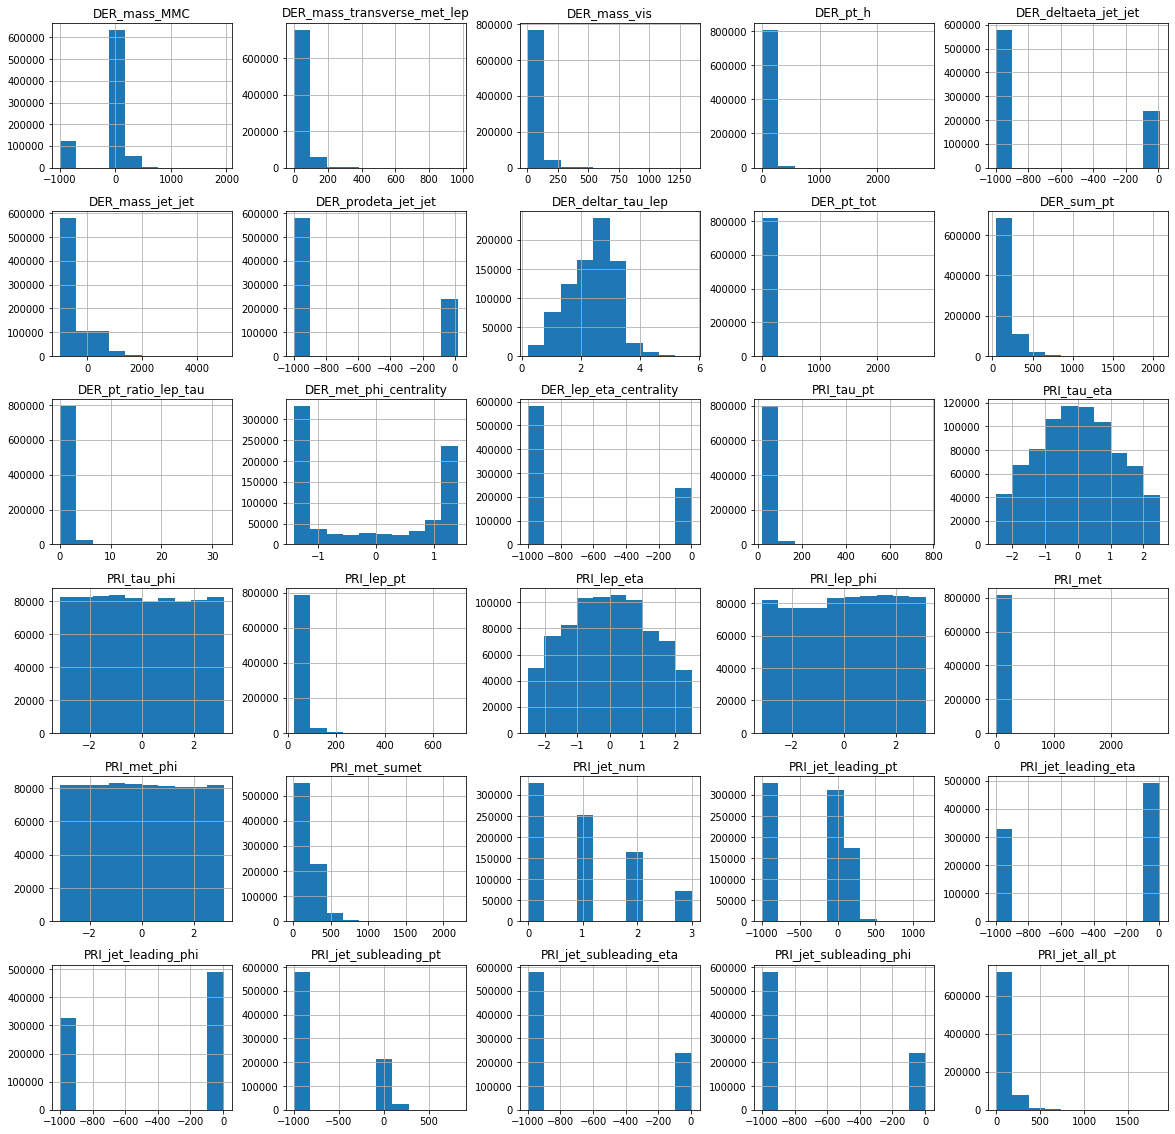

In [ ]:
df.hist(figsize=(20,20))

Since our problem is classifying the event it may be worth to plot how the classes are distributed

In [ ]:
import seaborn as sns

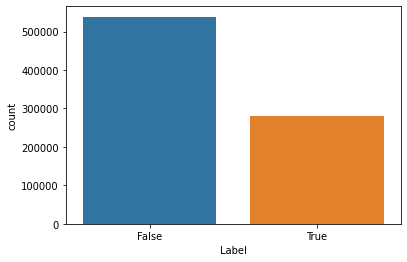

In [ ]:
sns.countplot(data=df, x='Label')

Our data set is quite big. It will be faster to make calculations and plots for smaller sample

In [ ]:
df1=df.sample(n=10000, random_state=1)

Let's plot distributions of a few variables for different classes 

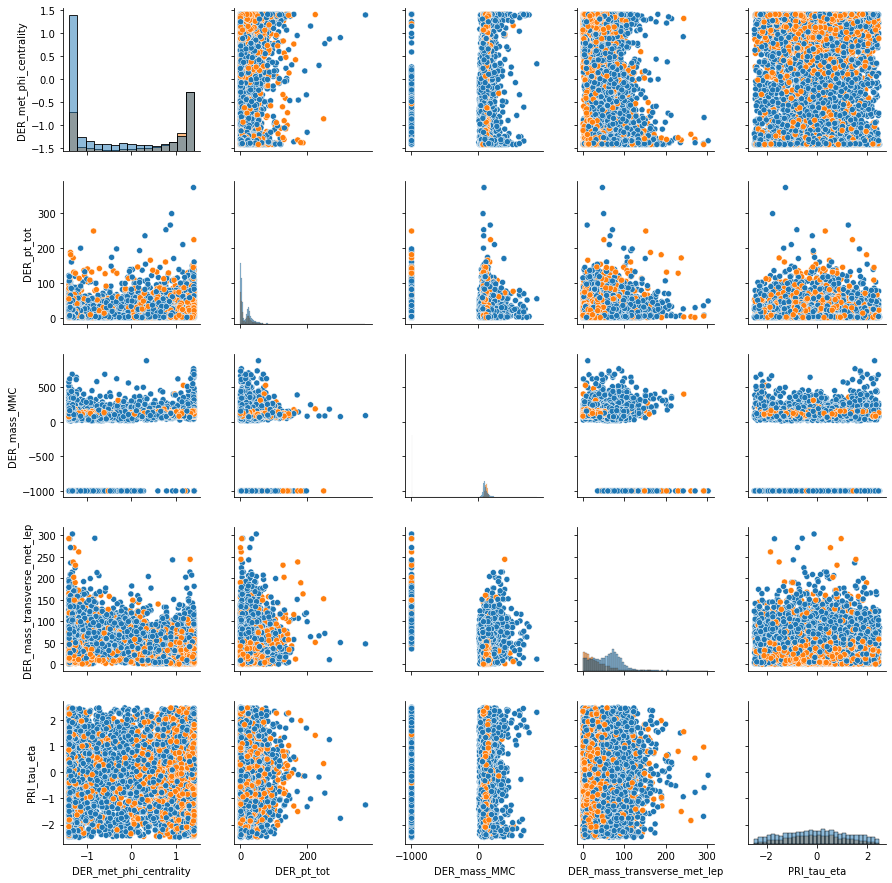

In [ ]:
graph = sns.PairGrid(df1[['DER_met_phi_centrality', 'DER_pt_tot', 'DER_mass_MMC', 'DER_mass_transverse_met_lep', 'PRI_tau_eta', 'Label']], hue = 'Label')
graph.map_diag(sns.histplot)
graph.map_offdiag(sns.scatterplot);

Another thing we can plot is the correlation matrix

In [ ]:
corr = df.corr()
corr

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Label
DER_mass_MMC,1.000000,-0.455013,0.171697,0.199594,0.163511,0.161496,0.163366,0.231129,0.045385,0.201857,...,0.222013,0.221498,0.249742,0.246586,0.246583,0.163717,0.163466,0.163462,0.185950,0.239030
DER_mass_transverse_met_lep,-0.455013,1.000000,0.190212,-0.251333,-0.178893,-0.192234,-0.178455,0.040346,0.013515,-0.146308,...,-0.166788,-0.211657,-0.228901,-0.219599,-0.219588,-0.179343,-0.178744,-0.178737,-0.210511,-0.350689
DER_mass_vis,0.171697,0.190212,1.000000,-0.062266,-0.030402,-0.038328,-0.030287,0.577233,-0.001239,0.090425,...,0.056359,-0.025115,-0.016434,-0.011046,-0.011036,-0.031295,-0.030363,-0.030359,-0.051010,-0.012586
DER_pt_h,0.199594,-0.251333,-0.062266,1.000000,0.522984,0.532930,0.522977,-0.542161,0.304827,0.833337,...,0.783675,0.623482,0.623049,0.566328,0.566321,0.531003,0.523040,0.523036,0.808338,0.194852
DER_deltaeta_jet_jet,0.163511,-0.178893,-0.030402,0.522984,1.000000,0.945891,0.999981,-0.299049,0.278548,0.671388,...,0.617967,0.867925,0.546223,0.523002,0.523004,0.999327,0.999995,0.999996,0.711709,0.143338
DER_mass_jet_jet,0.161496,-0.192234,-0.038328,0.532930,0.945891,1.000000,0.944285,-0.302931,0.255676,0.680001,...,0.615574,0.814336,0.522654,0.494423,0.494426,0.947536,0.945352,0.945356,0.719026,0.193064
DER_prodeta_jet_jet,0.163366,-0.178455,-0.030287,0.522977,0.999981,0.944285,1.000000,-0.299074,0.279108,0.671565,...,0.618277,0.868148,0.546219,0.522998,0.523001,0.999327,0.999988,0.999989,0.711897,0.142249
DER_deltar_tau_lep,0.231129,0.040346,0.577233,-0.542161,-0.299049,-0.302931,-0.299074,1.000000,-0.154959,-0.432648,...,-0.406602,-0.348742,-0.336276,-0.304666,-0.304646,-0.303366,-0.299090,-0.299084,-0.448114,0.011065
DER_pt_tot,0.045385,0.013515,-0.001239,0.304827,0.278548,0.255676,0.279108,-0.154959,1.000000,0.392607,...,0.461238,0.369933,0.206763,0.189803,0.189815,0.287234,0.278767,0.278769,0.415369,-0.013723
DER_sum_pt,0.201857,-0.146308,0.090425,0.833337,0.671388,0.680001,0.671565,-0.432648,0.392607,1.000000,...,0.905125,0.757869,0.639071,0.578950,0.578951,0.687189,0.671522,0.671521,0.965691,0.153840


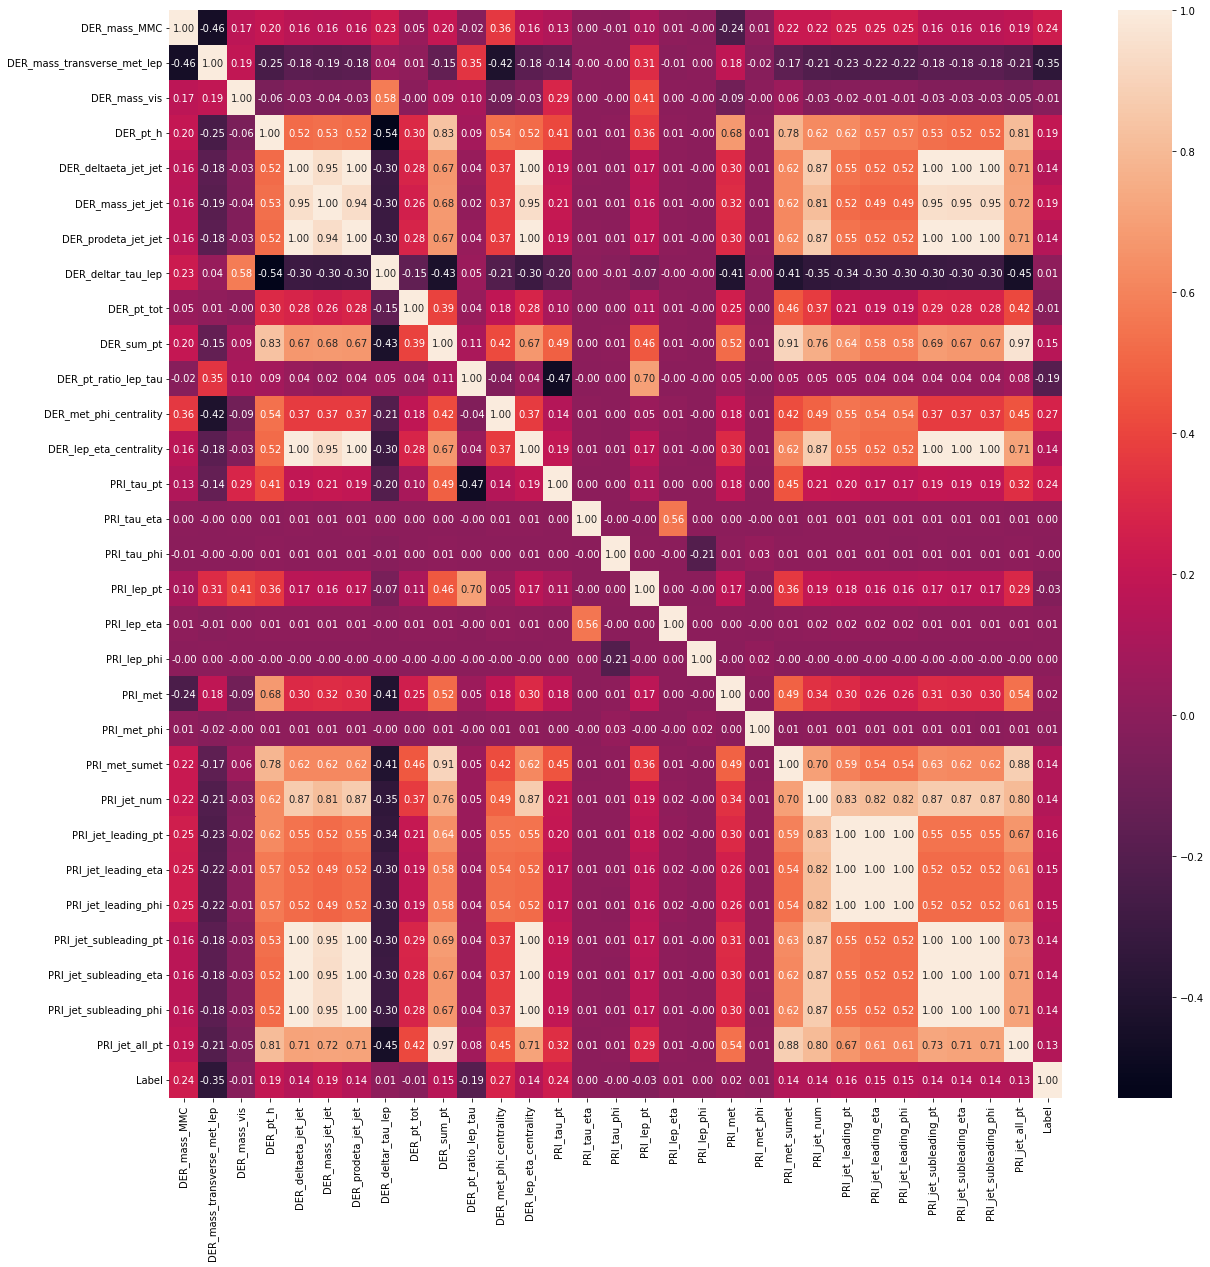

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, fmt = ".2f")

We've explored our dataset and learned a bit. Now is the time to prepared for our algorithm.

Since we will be doing supervised learning with a labeled dataset the idea is to split it into two subsets:
- train subset - used for training our model, 
- test subset - used for evaluating our model.

By keeping the test subset separated, we can use it to estimate how the model will behave on real data (unlabeled).

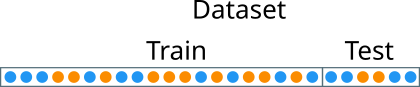

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df1.drop(columns = 'Label'), df1['Label'], test_size = 0.2, random_state=42)
print('X train size:\t', X_train.shape)
print('y train size:\t', y_train.shape)
print('X test size:\t', X_test.shape)
print('y test size:\t', y_test.shape)

X train size:	 (8000, 30)
y train size:	 (8000,)
X test size:	 (2000, 30)
y test size:	 (2000,)


On previous plots we've noticed that the variables can have different order of magnitudes. For our algorithm it'd be best if every variable was of the same order. To achieve this we need to rescale them

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Training

Now that our dataset has been preprocessed we can finally start training our model

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

It's done! Now we can check our model in action

In [ ]:
y_pred = model.predict(X_train[:5])
print(y_pred)
print(y_train[:5].values)

[ True  True False False False]
[ True False False  True False]


Our model made a few mistakes. We need to somehow evaluate it's results and looking at every event is not an option.

Let's introduce accuracy metric:

$\text{Accuracy}=\frac{\text{Number of correct predictions}}{\text{Total number 
of predictions}}$

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
y_pred = model.predict(X_train)
acc= accuracy_score(y_train, y_pred)
print('train set: accuracy score', acc)

train set: accuracy score 0.7445


So we calculated the accuracy of our model on the data in was trained. But the real use of our model is making prediction on unknown (unlabeled) data. We can estimated this by calculating our metric on test dataset

In [ ]:
y_pred = model.predict(X_test)
acc= accuracy_score(y_test, y_pred)
print('test set: accuracy score', acc)

test set: accuracy score 0.738


Is this good? Is accuracy a good metric?
Let's check what would be the result for a classifier that classifies everything as background (useless for finding signal).

In [ ]:
y_bg = np.zeros_like(y_test)
acc= accuracy_score(y_test, y_bg)
print('test set: accuracy score', acc)


test set: accuracy score 0.646


Our classifier is a bit better than this useless all-background classifier, but we see that accuracy is not the best metric for everything.

Also there are different types of mistakes. All-background classifier never mistakes background for signal, but always mistakes signal for background.

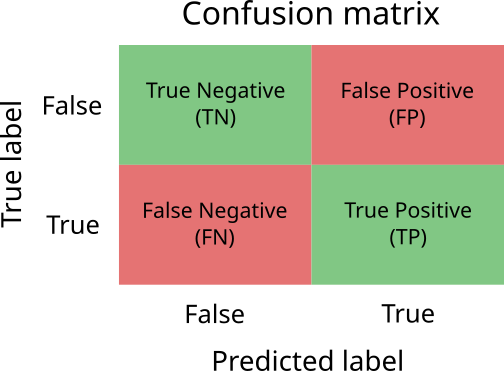

If we were classifying patients with cancer, we might consider completely different type of error prescribing unnecessary medical check for healthy patient (FP) or sending home a patient with operational cancer (FN).

🤔 If we classify a $Z\rightarrow \tau\tau$ event as a $H \rightarrow \tau\tau$, it's obviously a mistake. But is it FP or FN?




🙋 

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[1119,  173],
       [ 351,  357]])

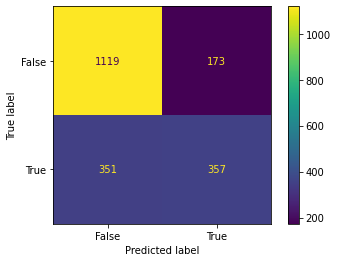

In [ ]:
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_).plot()

🤔 How would a confusion matrix for all-background classifier look like? How would it look like for a coin-flip classifier?


🙋 

Having the confusion matrix we can rewrite accuracy in its terms:

$\text{Accuracy} = \frac{\text{TP}+\text{TN}}{\text{TP}+\text{TN}+\text{FP}+\text{FN}}$

We can also introduce more metrics:

$\text{Precision} = \frac{\text{TP}}{\text{TP}+\text{FP}}$

$\text{Recall} = \frac{\text{TP}}{\text{TP}+\text{FN}}$

- Precision, positive predictive value (PPV) - How many retrieved events are relevant?
- Recall, sensitivity, true positive rate (TPR) - How many relevant events are retrieved?

We can construct many more metrics such asmiss rate, fall-out, false discovery rate, etc.

In [ ]:
from sklearn.metrics import precision_score, recall_score

In [ ]:
acc= accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f'accuracy: {acc:0.2f}')
print(f'precision: {precision:0.2f}')
print(f'recall: {recall:0.2f}')

accuracy: 0.74
precision: 0.67
recall: 0.50


Let's check if using this metric we can prove the superiority of our classifier over the all-background classifier

In [ ]:
acc= accuracy_score(y_test, y_bg)
precision = precision_score(y_test, y_bg)
recall = recall_score(y_test, y_bg)
print(all)
print(f'accuracy: {acc:0.2f}')
print(f'precision: {precision:0.2f}')
print(f'recall: {recall:0.2f}')

<built-in function all>
accuracy: 0.65
precision: 0.00
recall: 0.00


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Another thing worth noticing is that our model can not only predict classes but also return probabilities of belonging to those classes

In [ ]:
y_prob = model.predict_proba(X_test)[:,1]
print('Probabilities:\n',y_prob)
print('Classes:\n', y_prob>0.5)

Probabilities:
 [0.05991697 0.44330362 0.58469326 ... 0.28240847 0.39060649 0.61376787]
Classes:
 [False False  True ... False False  True]


When operating with probabilities we can set different thresholds for classifications (default 50%). For instance, we can choose to classify an event as signal only when we are 90% sure 

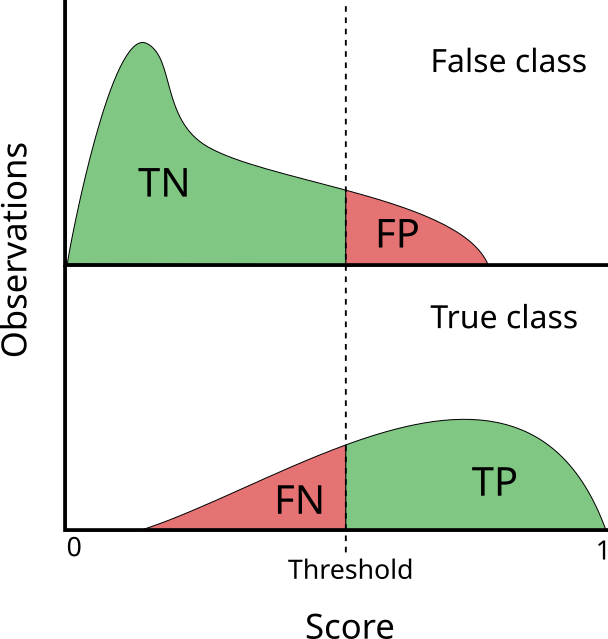

🤔 Why would we want to set higher threshold? How would it affect the precision and recall scores? 


🙋 

In [ ]:
for threshold in (0.25, 0.5, 0.75):
  print('threshold:', threshold)
  y_pred = y_prob>threshold
  print(f'\taccuracy: {accuracy_score(y_test, y_pred):0.2f}')
  print(f'\tprecision: {precision_score(y_test, y_pred):0.2f}')
  print(f'\trecall: {recall_score(y_test, y_pred):0.2f}')


threshold: 0.25
	accuracy: 0.70
	precision: 0.54
	recall: 0.89
threshold: 0.5
	accuracy: 0.74
	precision: 0.67
	recall: 0.50
threshold: 0.75
	accuracy: 0.68
	precision: 0.82
	recall: 0.13


We've seen that by manipulating threshold we can make precision and recall flexible. It would be interesting to have a metric that is threshold independent. Let's introduce even more metrics:

- ROC curve - receiver operating characteristic curve - parametric plot of true positive rate (recall, $\frac{\text{TP}}{\text{TP}+\text{FN}}$ ) vs false positive rate (fall-out, $\frac{\text{FP}}{\text{FP}+\text{TN}}$), where threshold is the parameter
- AUC - area under curve - integrated ROC curve

In [ ]:
from sklearn.metrics import RocCurveDisplay

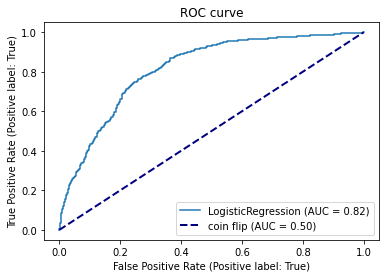

In [ ]:
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='coin flip (AUC = 0.50)')
plt.title('ROC curve')
plt.legend()

🤔 Ideal classifier would make a clear distinction between true and false classes (no FP or FN cases). What would be the shape of ROC curve for such classifier?


🙋 

Since we obtained tools for evaluating models, now it's time to train a different model and compare them!

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = model.predict(X_train)
acc= accuracy_score(y_train, y_pred)
print('train set: accuracy score', acc)

train set: accuracy score 1.0


Looks like we got 100% accuracy. Our model made no mistakes. All higgses found. Problem solved.

Before we call it a day, let's just for safety check accuracy on a test set

In [ ]:
y_pred = model.predict(X_test)
acc= accuracy_score(y_test, y_pred)
print('test set: accuracy score', acc)

test set: accuracy score 0.744


What happened? It's way worse than on the train set.

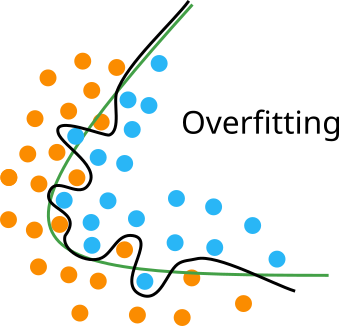

Getting much better results on a train set than on a test set is a classic example of overfitting.
Overfitting happens when the model instead of learning the general trend in our train set starts learning its detail.
An 'everyday life' example of overfiting is fitting a too high degree polynomial to data, so it starts reassembling the noise in the data.

To fight with overfitting we regularize our models by add add constrains or penalties for overly complicated models.

So far we used models with default (hyper)parameters but usually they have multiple hyperparameters to tune. The aim of this notebook is to show of general ideas rather than obtain a competitive model.

An example  regularization hyperparameter of `DecisionTreeClassifier` is `max_depth` which roughly controls how complicated our tree can be.

In [ ]:
max_depths = (20,10,2)
for max_depth in max_depths:
  print('max depth', max_depth)
  model = DecisionTreeClassifier(max_depth=max_depth)
  model.fit(X_train, y_train)

  y_pred = model.predict(X_train)
  print(f'\ttrain set: accuracy score {accuracy_score(y_train, y_pred):0.2f}')
  y_pred = model.predict(X_test)
  print(f'\ttest set: accuracy score {accuracy_score(y_test, y_pred):0.2f}')
  print(f'\ttest set: precision score {precision_score(y_test, y_pred):0.2f}')
  print(f'\ttest set: recall score {recall_score(y_test, y_pred):0.2f}')

max depth 20
	train set: accuracy score 0.99
	test set: accuracy score 0.75
	test set: precision score 0.66
	test set: recall score 0.62
max depth 10
	train set: accuracy score 0.91
	test set: accuracy score 0.78
	test set: precision score 0.69
	test set: recall score 0.68
max depth 2
	train set: accuracy score 0.78
	test set: accuracy score 0.78
	test set: precision score 0.70
	test set: recall score 0.66


Actually in the example above we kind of abused the test dataset. We trained the model several times and choose the one that behave the best on the test dataset. It'd be safer to do [cross-validation](https://scikit-learn.org/stable/modules/cross_validation.html) (out of scope of this notebook) while tuning and use the test set only for final check.

We will add a more advanced model `RandomForestClassifier` to the comparison just to show how different ROC curves can look like

In [ ]:
from sklearn.ensemble import RandomForestClassifier

accuracy: 0.82
precision: 0.79
recall: 0.67


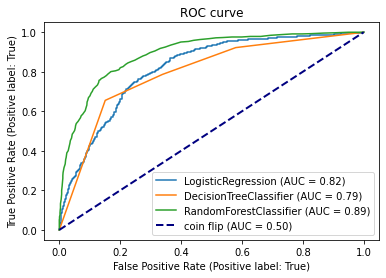

In [ ]:
clf_logistic = LogisticRegression()
clf_tree = DecisionTreeClassifier(max_depth=2)
clf_forest = RandomForestClassifier()
for model in (clf_logistic, clf_tree, clf_forest):
  model.fit(X_train,y_train)

graph = RocCurveDisplay.from_estimator(clf_logistic, X_test, y_test)
RocCurveDisplay.from_estimator(clf_tree, X_test, y_test, ax=graph.ax_)
RocCurveDisplay.from_estimator(clf_forest, X_test, y_test, ax=graph.ax_)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='coin flip (AUC = 0.50)')
plt.title('ROC curve')
plt.legend()

y_pred = clf_forest.predict(X_test)
print(f'accuracy: {accuracy_score(y_test, y_pred):0.2f}')
print(f'precision: {precision_score(y_test, y_pred):0.2f}')
print(f'recall: {recall_score(y_test, y_pred):0.2f}')

It can be quite surpising that the `DecisionTreeClasifier` even after some tuning is worse than the default `LogisticRegression`. To defend the `DecisionTreeClasifier` the regularizing hyperparameter we chose to touch is quite brutal for the tree, but we would need to learn a bit about decision tree classifiers to know it.

The usual workflow is:
- explore and pre-process the dataset, try adding more useful features if possible, 
- train many different algorithms,
- check how they behave on our data, 
- pick a few the most promising,
- fine tune hyperparameters of the chosen few,
- compare tuned model and pick the best.

In this notebook we'll skip the tuning. Nonetheless we have obtained a model than can classify $H$ with around 80% accuracy and precision, which is quite outstanding considering that we got this result using only the data and not diving deep into the physics.

## References and materials



- [scikit-learn](https://scikit-learn.org/stable/user_guide.html) - package documentation,
- [HEP-ML-Resources](https://github.com/iml-wg/HEP-ML-Resources) - git repository with collection of links to courses, classes, slides, papers, etc. about ML in HEP,
- [openddata.cern.ch](http://opendata.cern.ch/) - datasets and resources from CERN,
- [kaggle](https://www.kaggle.com) - dataset and challenges for ML,
- [usosweb](https://usosweb.fuw.edu.pl/kontroler.php?_action=katalog2/przedmioty/pokazPrzedmiot&prz_kod=1100-3BN17&callback=g_090c7e64) - a ML course at FUW,
- Hands-on Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems, Aurélien Géron - a book about ML I particulary like